In [16]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
#  Import and read the charity_data.csv.
import seaborn as sns
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head(2)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1


In [17]:
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [21]:
application_df['SPECIAL_CONSIDERATIONS']=application_df.SPECIAL_CONSIDERATIONS.map({"Y":1,"N":0})

In [22]:
application_df.corr()['IS_SUCCESSFUL']

EIN                      -0.044482
STATUS                   -0.001636
SPECIAL_CONSIDERATIONS         NaN
ASK_AMT                  -0.010861
IS_SUCCESSFUL             1.000000
Name: IS_SUCCESSFUL, dtype: float64

In [23]:
# Drop the non-beneficial ID columns
application_df.drop(['EIN','SPECIAL_CONSIDERATIONS','STATUS'],axis=1,inplace=True)
application_df.head(2)

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1


In [24]:
application_name_count=application_df['NAME'].value_counts().to_dict()
application_name_to_replace=[key for (key,value) in application_name_count.items() if value<5 ]
# Replace in dataframe
for app in application_name_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(app,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                                19803
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
                                                                     ...  
GUILDS OF THE SANTA FE OPERA INC                                         5
FAMILY MOTOR COACH ASSOCIATION                                           5
JAMESTOWN SOCIETY                                                        5
MOST WORSHIPFUL PRINCE HALL GRAND LODGE OF FREE & ACCEPTED MASONS        5
PTA HAWAII CONGRESS                                                      5
Name: NAME, Length: 403, dtype: int64

In [25]:
application_types_count=application_df['APPLICATION_TYPE'].value_counts().to_dict()
application_types_to_replace=[key for (key,value) in application_types_count.items() if value<500 ]
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [26]:
CLASSIFICATION_value_counts=application_df['CLASSIFICATION'].value_counts().to_dict()
classifications_to_replace=[key for (key,value) in CLASSIFICATION_value_counts.items() if value<1000]
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [27]:
dummy_df=pd.get_dummies(application_df)
dummy_df.head(2)

,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,108590,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [28]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X=dummy_df.drop(['IS_SUCCESSFUL'],axis=1).values
y=dummy_df['IS_SUCCESSFUL'].values
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Create a StandardScaler instances
sc = StandardScaler()

# Fit the StandardScaler
X_scaler = sc.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
X_train_scaled.shape[1]

443

## STEP1&2 optimizing result(the model was the same, the part of data preprocessing was changed)

In [31]:
input_shape=X_train_scaled.shape[1]
nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(Dense(units=80, input_dim=input_shape, activation='relu'))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(Dense(30, activation='relu'))
# Output layer
#  YOUR CODE GOES HERE
nn.add(Dense(1, activation='sigmoid'))
# Check the structure of the model
nn.compile(loss='binary_crossentropy',metrics=["accuracy"],optimizer='adam')

history=nn.fit(X_train_scaled, y_train,epochs=100)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
858/858 [==============================] - 0s 569us/step - loss: 0.4638 - accuracy: 0.7842
Epoch 2/100
858/858 [==============================] - ETA: 0s - loss: 0.4280 - accuracy: 0.79 - 0s 558us/step - loss: 0.4282 - accuracy: 0.7957
Epoch 3/100
858/858 [==============================] - 0s 561us/step - loss: 0.4226 - accuracy: 0.7986
Epoch 4/100
858/858 [======

858/858 [==============================] - 0s 565us/step - loss: 0.4001 - accuracy: 0.8096
Epoch 71/100
858/858 [==============================] - 0s 549us/step - loss: 0.3999 - accuracy: 0.8101
Epoch 72/100
858/858 [==============================] - 0s 553us/step - loss: 0.3995 - accuracy: 0.8106
Epoch 73/100
858/858 [==============================] - 0s 552us/step - loss: 0.3998 - accuracy: 0.8107
Epoch 74/100
858/858 [==============================] - 0s 559us/step - loss: 0.3995 - accuracy: 0.8104
Epoch 75/100
858/858 [==============================] - 0s 559us/step - loss: 0.3994 - accuracy: 0.8099
Epoch 76/100
858/858 [==============================] - 0s 554us/step - loss: 0.3988 - accuracy: 0.8104
Epoch 77/100
858/858 [==============================] - 0s 577us/step - loss: 0.3991 - accuracy: 0.8100
Epoch 78/100
858/858 [==============================] - 0s 575us/step - loss: 0.3991 - accuracy: 0.8106
Epoch 79/100
858/858 [==============================] - 0s 577us/step - loss:

In [33]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.4779 - accuracy: 0.7880
Loss: 0.47794005274772644, Accuracy: 0.788046658039093


<AxesSubplot:>

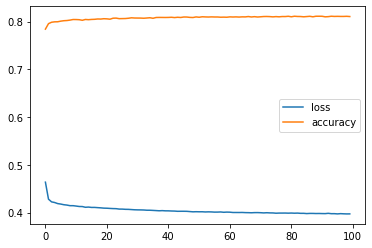

In [34]:
model_loss = pd.DataFrame(history.history)
model_loss.plot()

## STEP 3 optimizing result(the model was changed, the part of data preprocessing was changed)

In [103]:
input_shape=X_train_scaled.shape[1]
nn1 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn1.add(Dense(units=443, input_dim=input_shape, activation='tanh'))

# Second hidden layer
#  YOUR CODE GOES HERE
nn1.add(Dense(35, activation='tanh'))

nn1.add(Dense(3, activation='tanh'))
# Output layer
#  YOUR CODE GOES HERE
nn1.add(Dense(1, activation='sigmoid'))
# Check the structure of the model
nn1.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 443)               196692    
_________________________________________________________________
dense_73 (Dense)             (None, 35)                15540     
_________________________________________________________________
dense_74 (Dense)             (None, 3)                 108       
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 4         
Total params: 212,344
Trainable params: 212,344
Non-trainable params: 0
_________________________________________________________________


In [104]:
nn1.compile(loss='binary_crossentropy',metrics=["accuracy"],optimizer='adam')

In [105]:
mc = tf.keras.callbacks.ModelCheckpoint('model/optim/weights{epoch:08d}.h5',save_weights_only=True, period=5)
from tensorflow.keras.callbacks import EarlyStopping    
early_stop = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)    
history=nn1.fit(X_train_scaled, y_train,epochs=100, callbacks=[early_stop])

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
858/858 [==============================] - 1s 974us/step - loss: 0.4795 - accuracy: 0.7784
Epoch 2/100
858/858 [==============================] - 1s 914us/step - loss: 0.4406 - accuracy: 0.7920
Epoch 3/100
858/858 [==============================] - 1s 903us/step - loss: 0.4307 - accuracy: 0.7968
Epoch 4/100
858/858 [==============================] - 1s 907us/step 

In [107]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.4491 - accuracy: 0.7882
Loss: 0.4490757882595062, Accuracy: 0.7881923913955688


<AxesSubplot:>

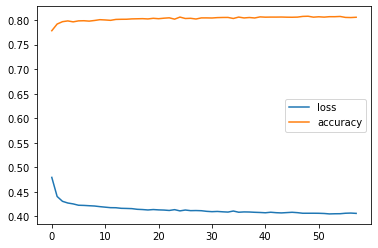

In [108]:
model_loss = pd.DataFrame(history.history)
model_loss.plot()

In [109]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
nn1.save('model/optim/optimized_model.h5')

In [127]:
model_loss2, model_accuracy2 = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss2}, Accuracy: {model_accuracy2}")

215/215 - 0s - loss: 0.4519 - accuracy: 0.7837
Loss: 0.45190849900245667, Accuracy: 0.7836734652519226
